In [1]:
import pandas as pd
housing = pd.read_csv("data.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [2]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [3]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

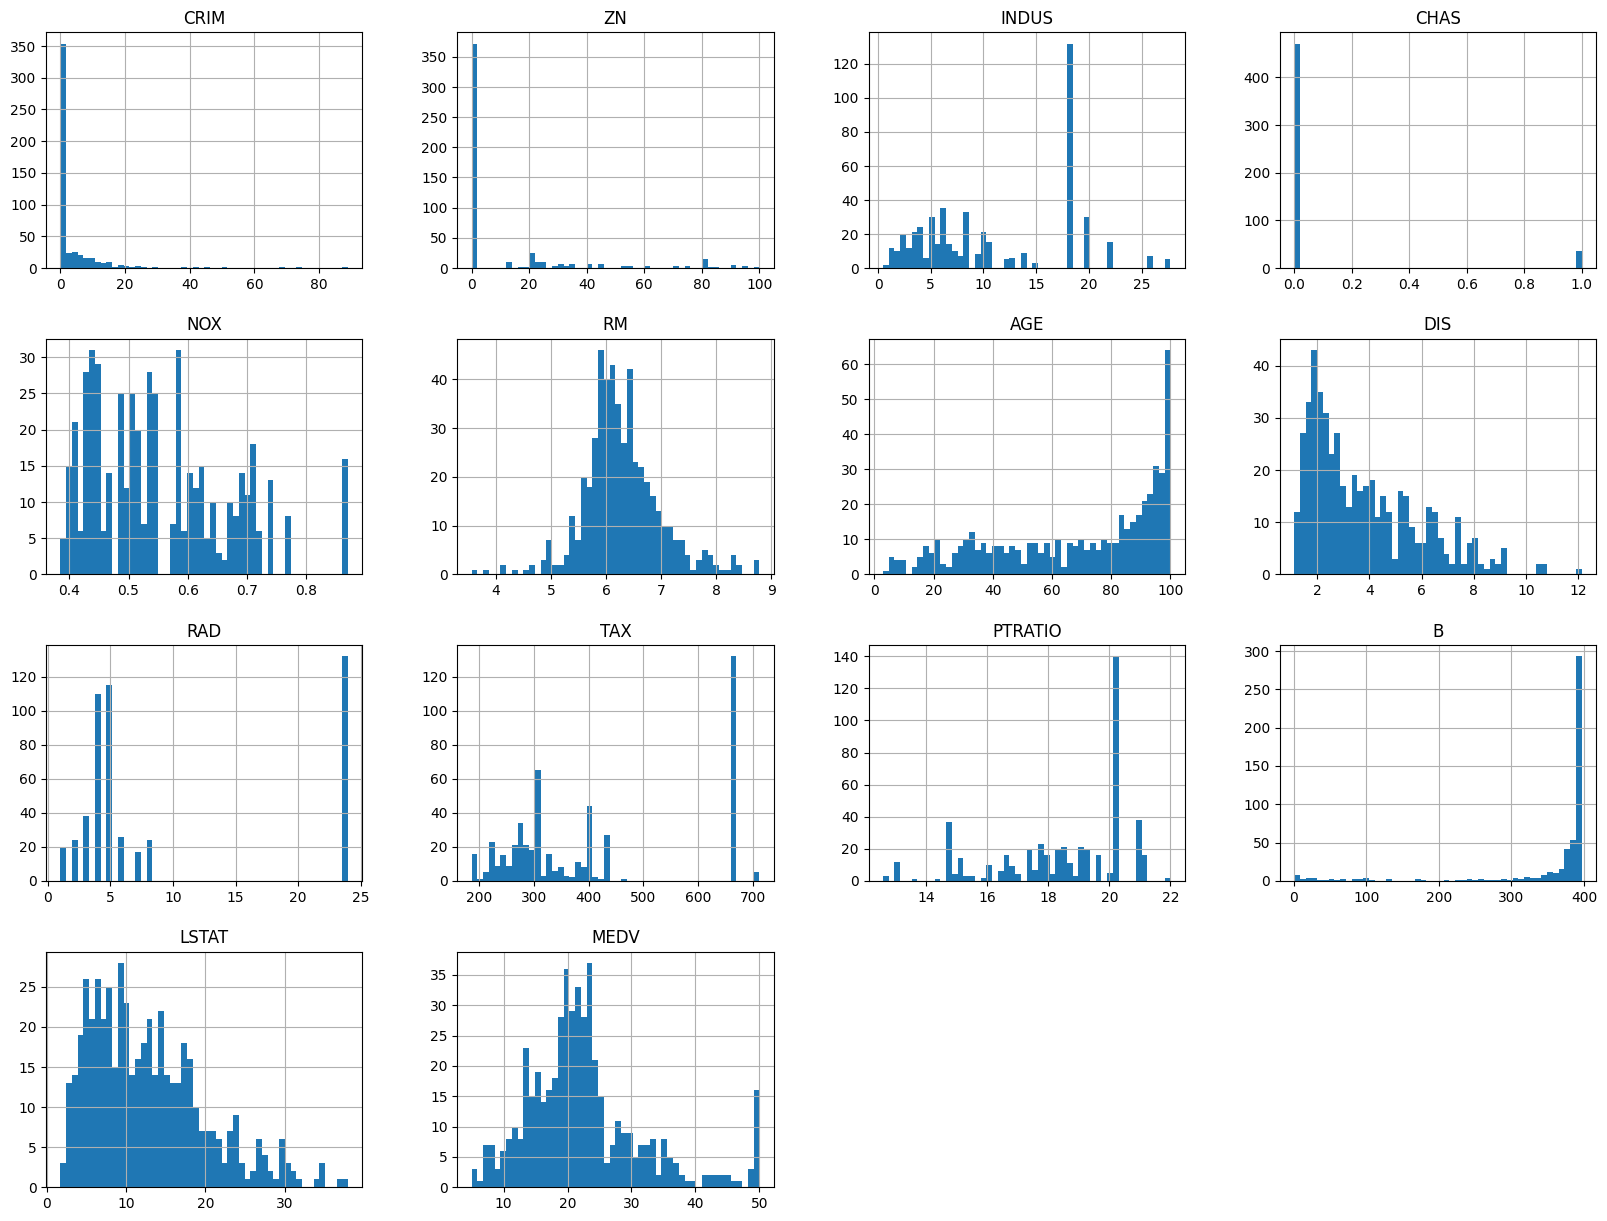

In [6]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

Train-Test splitiing

In [7]:
import numpy as np
def split_train(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [8]:
train_set,test_set = split_train(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [9]:
print(f"rows in train set {len(train_set)}\n rows in test set {len(test_set)}")


rows in train set 405
 rows in test set 101


In [10]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set {len(train_set)}\n rows in test set {len(test_set)}")


rows in train set 404
 rows in test set 102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
housing['CHAS'].value_counts()


CHAS
0    471
1     35
Name: count, dtype: int64

In [14]:
strat_test_set.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00906   90.0  2.97   0     0.400  7.088  20.8   7.3073  1    285  15.3     394.72  7.85   32.2    1
0.01360   75.0  4.00   0     0.410  5.888  47.6   7.3197  3    469  21.1     396.90  14.80  18.9    1
0.01381   80.0  0.46   0     0.422  7.875  32.0   5.6484  4    255  14.4     394.23  2.97   50.0    1
0.01439   60.0  2.93   0     0.401  6.604  18.8   6.2196  1    265  15.6     376.70  4.38   29.1    1
0.01538   90.0  3.75   0     0.394  7.454  34.2   6.3361  3    244  15.9     386.34  3.11   44.0    1
                                                                                                   ..
17.86670  0.0   18.10  0     0.671  6.223  100.0  1.3861  24   666  20.2     393.74  21.78  10.2    1
18.49820  0.0   18.10  0     0.668  4.138  100.0  1.1370  24   666  20.2     396.90  37.97  13.8    1
23.64820  0.0   18.10  0     0.671  6.380  96.2   1.3861  24   666  20.2     396.90  23

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [17]:
housing = strat_train_set.copy()
## we have to stop here if we have a larger data set need to be trained

Looking for Correlation

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values()

LSTAT     -0.740494
PTRATIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.680857
MEDV       1.000000
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

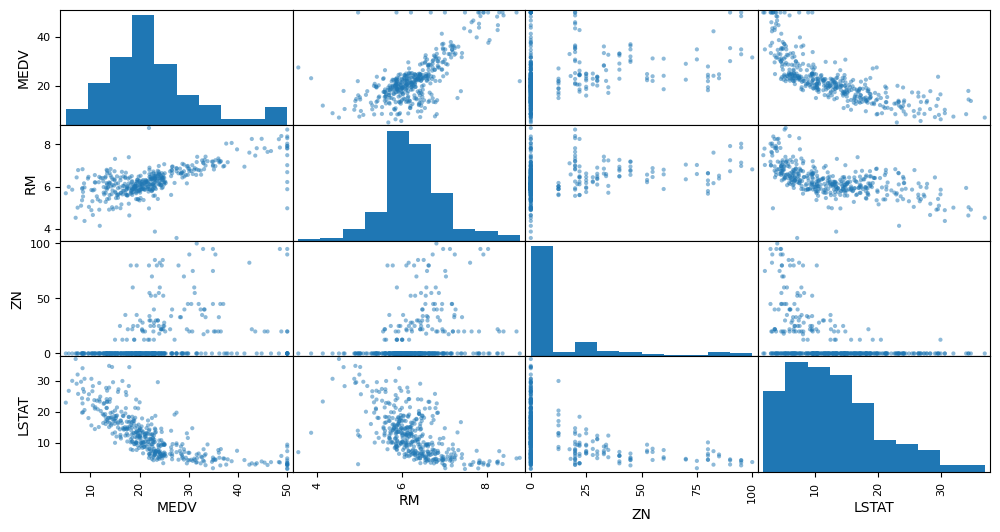

In [20]:
from pandas.plotting import scatter_matrix
attributes= ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,6))

<Axes: xlabel='RM', ylabel='MEDV'>

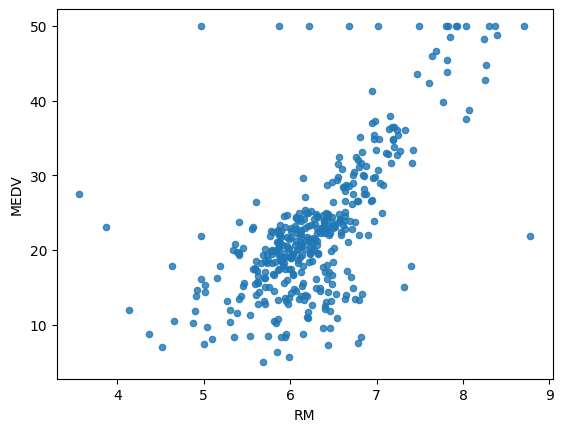

In [21]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## ATTRIBUTE COMBINATION

In [22]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [23]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
254     16.4  392.89   6.57  21.9   51.571709  
348     17.0  390.94   5.99  24.5   42.200452  
476     20.2  396.21  18.68  16.7  102.714374  
321     19.6  396.90   6.87  23.1   45.012547  
326     19.6  396.90   6.15  23.0   45.468948

In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

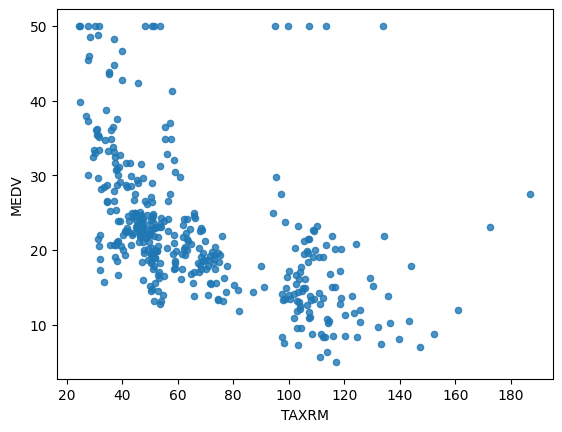

In [25]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

### MISSING ATTIBUTES

#### to take care of missing attributs
#### 1.get rid of the missing attibutes
#### 2.get rid of the whole attribute
#### 3.set the value to some value(0,mean or median)

In [27]:
a=housing.dropna(subset=["RM"]) # option 1
a.shape

(399, 13)

In [28]:
a = housing.drop("RM",axis=1)#option 2
a.shape

(404, 12)

In [29]:
median = housing["RM"].median()

In [30]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  399.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.279481   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.716784   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.876500   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.209000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630500   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns=housing.columns)
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.278609   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.712366   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.209000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.099057    8.731259  168.672623    2.129243   96.069235   
min      2.900000    1.129600    1.000000  187.000000   13.000000    0.320000   
25%     44.850000    2.035975    4.000000  284.000000   17.400000  374.617500   
50%     78.200000    3.122200    5.000000  337.000000   19.000000  390.955000   
75%     94.100000    5.100400   24.000000  666.000000   20.200000  395.630000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  404.000000  
mean    12.791609  
std      7.235740  
min      1.730000  
25%      6.847500  
50%     11.570000  
75%     17.102500  
max     36.980000

## SCIKIT LEARN DESIGN

primarly three types of object

1.Estimators = It estimates some parameters based on the dataset eg imputer
it has fit method and transform method

Fit method = fits the dataset and calculates the internal parameters.

2.Transformers = transform method takes input and return output based on the learning from fit() . It has has a convience function called fit_transform() which fits and transforms.

3.Predictors = Linear regression model is an example of predictor . fit (),predict() are two common functions . It also give some score function which will evaluate some predictions.

## Feature Scaling

two types of feature sacling method
1.Min-max scaling(normalization)=value is between 0 and 1
(value-min)/(max-min)
sklearn provides class called minMaxScaler

2.Standardization
X(sd) = x-mean/std
sklearn provides a class called standard scaler 

## creating pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),
])


In [36]:
housing_num_tr = my_pipe.fit_transform(housing_tr)

In [37]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for the project

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels[:5]

In [41]:
prepared_data = my_pipe.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.463, 25.471, 16.331, 23.488, 23.459])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

 # EVALUATING MODEL

In [44]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [45]:
rmse

np.float64(1.1634295517057218)

using better evaluation technique - Cross validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores


array([2.77806021, 2.72924632, 4.37720047, 2.53091732, 3.3315517 ,
       2.6303775 , 4.76386489, 3.33641865, 3.34755642, 3.19442273])

In [48]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("standard deviation:",scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [2.77806021 2.72924632 4.37720047 2.53091732 3.3315517  2.6303775
 4.76386489 3.33641865 3.34755642 3.19442273]
Mean: 3.301961620269954
standard deviation: 0.7040608050208857


# SAVING THE MODEL

In [50]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

Testing the model on test data

In [51]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipe.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
#print(final_prediction, list(Y_test))

In [52]:
final_rmse

np.float64(2.913198895359115)

In [53]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [54]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-1.43942006, .12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -4.31238772,  7.451111401, -2.0016879 , -0.5778192 ,
       -0.97491834,  0.231164221, -66.86091034]])
model.predict(features)

array([23.561])